In [31]:
# Write a function LinearSpline(points) that returns the list [LS1(x), LS2(x), . . . , LSn(x)] where LSi(x) is the
# piece of the linear spline function LS(x) interpolating points on the interval [xi−1, xi]
def LinearSpline(points):
    # create array to hold results
    results = []
    # for each point in the list find the linear spline polynomial
    for i in range(len(points)):
        # the first point does not have a linear spline polynomial
        if i == 0:
            continue
        else:
            # create a linear spline polynomial
            LS = points[i-1][1]*(x-points[i][0])/(points[i-1][0]-points[i][0]) + points[i][1]*(x-points[i-1][0])/(points[i][0]-points[i-1][0])
            # append the linear spline polynomial to the result array
        results.append(LS)
    # return the result array if something goes wrong
    # reverse the result array so that the first element is the first linear spline polynomial
    # return results[::-1]
    return results


points = [[2, 1], [4, 2], [8, 3]]
print("Linear Spline: ", LinearSpline(points))





Linear Spline:  [1/2*x, 1/4*x + 1]
Linear Spline:  [-7/5*x + 39/5, x + 3, 7, -8/7*x + 121/7, 2/3*x - 35/3]


In [71]:
# Write a function NaturalQuadraticSpline(points) that returns the list [QS1(x), QS2(x), . . . , QSn(x)] where
# QSi(x) is the piece of the natural quadratic spline function QS(x) interpolating points on the interval [xi−1, xi]

def NaturalQuadraticSpline(points):
    # create array to hold results
    results = []
    arrZ = []
    # determine the Zi values assuming the first point is 0
    for i in range(len(points)):
        if i == 0:
            zi = 0
            arrZ.append(zi)
        else:
            zi = 2*((points[i][1] - points[i - 1][1]) / (points[i][0] - points[i - 1][0])) - arrZ[i-1]
            arrZ.append(zi)
    # with the Zi values determine the quadratic spline polynomial
    for i in range(len(points)):
        # the first point does not have a quadratic spline polynomial
        if i == 0:
            continue
        else:
            # create a quadratic spline polynomial
            QS = (arrZ[i] - arrZ[i - 1]) / (2 * (points[i][0] - points[i - 1][0])) \
                * (x - points[i - 1][0])^2 + arrZ[i - 1] * (x - points[i - 1][0]) + points[i - 1][1]
            # print each variable in the quadratic spline polynomial
            # append the quadratic spline polynomial to the result array
            results.append(QS.full_simplify())
    # return the results
    return results

points = [[2, 1], [4, 2], [8, 3]]
print("Quadratic Spline: ", NaturalQuadraticSpline(points))



Quadratic Spline:  [1/4*x^2 - x + 2, -3/16*x^2 + 5/2*x - 5]


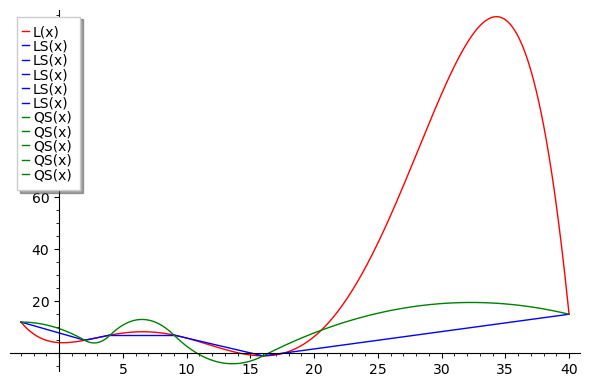

In [72]:
# Use your functions above and your LagrangeInterpolation function from Assignment 2 to plot L(x), LS(x),
# and QS(x) that interpolate the points from Example 1 on worksheet 6.2 together (in different colours).

#first I will get the Lagrange basis Polynomials from my Lab05 solution
def LagrangePoly(i,points):
    L = 1
    for j in range(len(points)):
        if(i != j):
            L *= (x-points[j][0])/(points[i][0]-points[j][0])
    return L
#as a challenge to myself, I wrote the function in one line
#If you'd prefer to see a more convential method, comment out the one line and uncomment the other lines
def LagrangeInterpolation(points):
    return expand(sum(points[i][1]*LagrangePoly(i,points) for i in range(len(points))))
    # p = 0
    # n = len(points)
    # for i in range(n):
    # p += points[i][1]*LagrangePoly(i,points)
    # return expand(p)


def LinearSpline(points):
    # create array to hold results
    results = []
    # for each point in the list find the linear spline polynomial
    for i in range(len(points)):
        # the first point does not have a linear spline polynomial
        if i == 0:
            continue
        else:
            # create a linear spline polynomial
            LS = points[i-1][1]*(x-points[i][0])/(points[i-1][0]-points[i][0]) + points[i][1]*(x-points[i-1][0])/(points[i][0]-points[i-1][0])
            # append the linear spline polynomial to the result array
        results.append(LS)
    # return the result array if something goes wrong
    # reverse the result array so that the first element is the first linear spline polynomial
    # return results[::-1]
    return results


points = [[-3, 12], [2, 5], [4, 7], [9, 7], [16, -1], [40, 15]]
interval = [-3, 40]
# plot the lagrange interpolation 
#myPlot = plot(LagrangeInterpolation(points), (-10, 50),  color = 'red')
# plot the lagrange interpolation as a list loop
myPlot = plot(LagrangeInterpolation(points), interval,  color = 'red', legend_label = 'L(x)')
# plot the linear spline
linear_spline = LinearSpline(points)
# plot the linear spline on the inteveral of each point
for i in range(len(points)):
    if i == 0:
        continue
    else:
        myPlot += plot(linear_spline[i-1], (x, points[i-1][0], points[i][0]), color = 'blue', legend_label = 'LS(x)')
# plot the quadratic spline on the inteveral of each point
quadratic_spline = NaturalQuadraticSpline(points)
for i in range(len(points)):
    if i == 0:
        continue
    else:
        myPlot += plot(quadratic_spline[i-1], (x, points[i-1][0], points[i][0]), color = 'green', legend_label = 'QS(x)')
myPlot.show()